In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.changetoarray import change_array_x,change_array_y
from src.mean import get_mean
from src.covariance import get_covariance
from src.standard_deviation_x import get_std_x

In [15]:
#Load the DataFrame
df=pd.read_csv("Salary_dataset.csv")
df.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [16]:
#Check the column names of the dataframe
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [17]:
#Drop unnecessary column
df.drop(df.columns[0],axis=1,inplace=True)

In [18]:
df.head(5)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [19]:
#Get the information about the columnns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [20]:
#Ensure that there is no null value in the columns
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [21]:
#Implement the function in order to change dataframe into numpy array
X_arr=change_array_x(df)
y_arr=change_array_y(df)

In [22]:
#Implement the function in order to get mean of the arrays
mean_x=get_mean(X_arr)
mean_y=get_mean(y_arr)

In [23]:
#Implement the function in order to get covariance of the arrays
covariance=get_covariance(X_arr,y_arr,mean_x,mean_y)

In [24]:
#Implement the function in order to get standart deviation of the arrays
std_x=get_std_x(X_arr,mean_x)

$$\bar{y} = b_1 \bar{x} + b_0$$


In [28]:
b1=covariance/(std_x**2)
b0=mean_y-b1*mean_x


In [29]:
print(b1)
print(b0)

9449.962321455077
24848.203966523193


The equation with specific values for \( b1 \) and \( b0 \) is:

$$
\bar{y} = 9449.962321455077 \cdot \bar{x} + 24848.203966523193
$$



In [31]:
#Get the predicted y values based on the coefficients
y_pred=b1*(X_arr)+b0
y_pred


array([ 36188.15875227,  38078.15121656,  39968.14368085,  44693.12484158,
        46583.11730587,  53198.09093089,  54143.08716303,  56033.07962732,
        56033.07962732,  60758.06078805,  62648.05325234,  63593.04948449,
        63593.04948449,  64538.04571663,  68318.03064522,  72098.0155738 ,
        73988.00803809,  75878.00050238,  81547.97789525,  82492.9741274 ,
        90052.94398456,  92887.932681  , 100447.90253816, 103282.8912346 ,
       108007.87239533, 110842.86109176, 115567.84225249, 116512.83848464,
       123127.81210966, 125017.80457395])

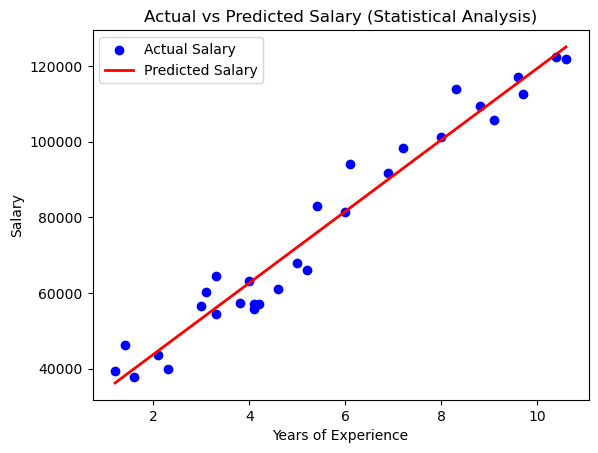

In [33]:
plt.scatter(X_arr, y_arr, color='blue', label='Actual Salary')
plt.plot(X_arr, y_pred, color='red', label='Predicted Salary', linewidth=2)
plt.title('Actual vs Predicted Salary (Statistical Analysis)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()